# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [45]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [46]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [47]:
reg_tip = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.52e-06
Time:                        14:02:48   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

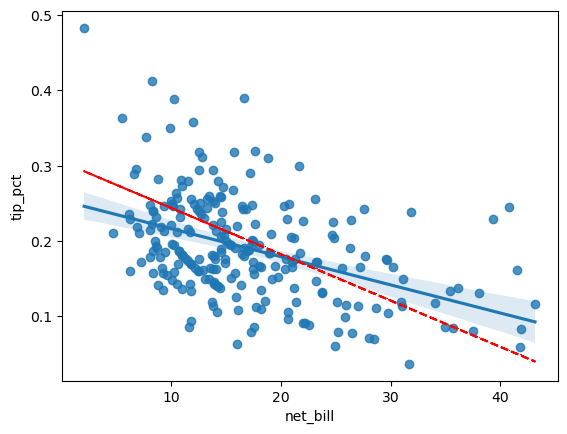

In [48]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], reg_tip.fittedvalues, 'r,--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [49]:
reg = smf.ols('tip_pct ~ np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     60.24
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           2.35e-13
Time:                        14:02:51   Log-Likelihood:                 123.44
No. Observations:                 244   AIC:                            -242.9
Df Residuals:                     242   BIC:                            -235.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.62

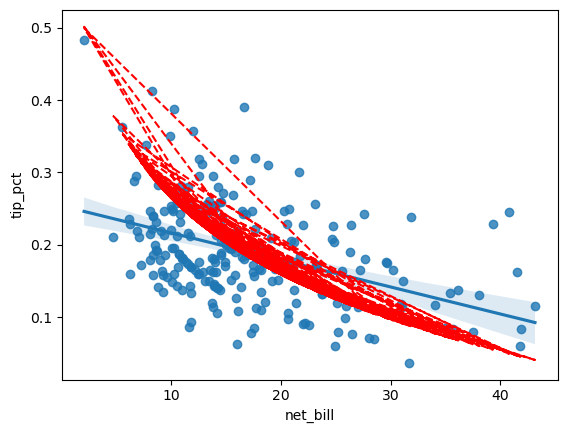

In [50]:
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [51]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.06e-09
Time:                        14:02:53   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

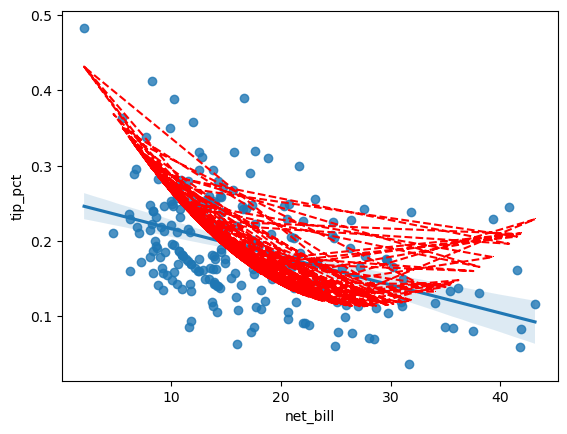

In [52]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips[tips['tip_pct']<.5])
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [59]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()


In [54]:
tips['pred_y'] = np.exp(reg.fittedvalues)

tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2

0.11440988592529756

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [57]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()


In [58]:
tips['pred_y'] = np.exp(reg.fittedvalues)

tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2

0.30894874740322287

###  6. qual modelo resultou no melhor ajuste?

O ajusto com as duas duas tranformações em log, tanto do eixo y quanto a do x